In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('data/FAO.csv', encoding = 'latin-1')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              179

In [4]:
df1 = df1.loc[:, ['Area', 'Unit', 'Element', 'Item', 'Y2013', 'Y1993']]
df1

,Area,Unit,Element,Item,Y2013,Y1993
0,Afghanistan,1000 tonnes,Food,Wheat and products,4895,1840.0
1,Afghanistan,1000 tonnes,Food,Rice (Milled Equivalent),422,218.0
2,Afghanistan,1000 tonnes,Feed,Barley and products,360,50.0
3,Afghanistan,1000 tonnes,Food,Barley and products,89,155.0
4,Afghanistan,1000 tonnes,Feed,Maize and products,200,141.0
...,...,...,...,...,...,...
21472,Zimbabwe,1000 tonnes,Food,Milk - Excluding Butter,451,297.0
21473,Zimbabwe,1000 tonnes,Feed,"Fish, Seafood",15,0.0
21474,Zimbabwe,1000 tonnes,Food,"Fish, Seafood",40,33.0
21475,Zimbabwe,1000 tonnes,Food,"Aquatic Products, Other",0,0.0


In [5]:
df1 = df1[(df1.Area=='Japan') |
         (df1.Area=='United States of America') |
         (df1.Area=='India') |
         (df1.Area=='Norway') |
         (df1.Area=='Senegal')]
df1

,Area,Unit,Element,Item,Y2013,Y1993
9033,India,1000 tonnes,Feed,Wheat and products,1870,687.0
9034,India,1000 tonnes,Food,Wheat and products,75833,53528.0
9035,India,1000 tonnes,Feed,Rice (Milled Equivalent),2124,1606.0
9036,India,1000 tonnes,Food,Rice (Milled Equivalent),87006,70216.0
9037,India,1000 tonnes,Feed,Barley and products,158,136.0
...,...,...,...,...,...,...
20530,United States of America,1000 tonnes,Feed,Milk - Excluding Butter,481,711.0
20531,United States of America,1000 tonnes,Food,Milk - Excluding Butter,81513,67017.0
20532,United States of America,1000 tonnes,Feed,"Fish, Seafood",563,1748.0
20533,United States of America,1000 tonnes,Food,"Fish, Seafood",6883,5994.0


In [6]:
df1[(df1.Item == 'Wheat and products') & (df1.Area == 'Japan')]

,Area,Unit,Element,Item,Y2013,Y1993
10071,Japan,1000 tonnes,Feed,Wheat and products,1156,595.0
10072,Japan,1000 tonnes,Food,Wheat and products,5727,5364.0


In [7]:
df1 = df1[(df1.Element == 'Food')]

In [8]:
df1[(df1.Item == 'Wheat and products') & (df1.Area == 'Japan')]

,Area,Unit,Element,Item,Y2013,Y1993
10072,Japan,1000 tonnes,Food,Wheat and products,5727,5364.0


In [11]:
people_in_thousands2013 = {'Japan':128542, 'United States of America':309011, 'India':1234281, 'Norway':4885, 'Senegal':12678}
people_in_thousands1993 = {'Japan':124738, 'United States of America':259918, 'India':886743, 'Norway':4311, 'Senegal':	7961}

In [12]:
df1['kg/(person*year) 2013']  = df1.apply(lambda row:
                                          row.Y2013*1000/people_in_thousands2013[row.Area], axis = 1)
df1['kg/(person*year) 1993']  = df1.apply(lambda row:
                                          row.Y1993*1000/people_in_thousands1993[row.Area], axis = 1)

C:\Users\grzes\AppData\Local\Temp/ipykernel_10740/1223133061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['kg/(person*year) 2013']  = df1.apply(lambda row:
C:\Users\grzes\AppData\Local\Temp/ipykernel_10740/1223133061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['kg/(person*year) 1993']  = df1.apply(lambda row:


In [10]:
import numpy as np
np.unique(df1.Item)

array(['Alcoholic Beverages', 'Animal fats', 'Apples and products',
       'Aquatic Animals, Others', 'Aquatic Plants',
       'Aquatic Products, Other', 'Bananas', 'Barley and products',
       'Beans', 'Beer', 'Beverages, Alcoholic', 'Beverages, Fermented',
       'Bovine Meat', 'Butter, Ghee', 'Cassava and products',
       'Cephalopods', 'Cereals - Excluding Beer', 'Cereals, Other',
       'Citrus, Other', 'Cloves', 'Cocoa Beans and products',
       'Coconut Oil', 'Coconuts - Incl Copra', 'Coffee and products',
       'Cottonseed Oil', 'Cream', 'Crustaceans', 'Dates', 'Demersal Fish',
       'Eggs', 'Fats, Animals, Raw', 'Fish, Body Oil', 'Fish, Liver Oil',
       'Fish, Seafood', 'Freshwater Fish', 'Fruits - Excluding Wine',
       'Fruits, Other', 'Grapefruit and products',
       'Grapes and products (excl wine)', 'Groundnut Oil',
       'Groundnuts (Shelled Eq)', 'Honey', 'Infant food',
       'Lemons, Limes and products', 'Maize Germ Oil',
       'Maize and products', 'Marine

In [215]:
# Libraries
import matplotlib.pyplot as plt
from math import pi

# Set data
df = pd.DataFrame({
    'var1': [38, 1.5, 30, 4],
    'var2': [29, 10, 9, 34],
    'var3': [8, 39, 23, 24],
    'var4': [7, 31, 33, 14],
    'var5': [28, 15, 32, 14]
})

def spider(df):
    categories=list(df)
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.loc[0].values.flatten().tolist()
    values += values[:1]
    values
    values2=df.loc[1].values.flatten().tolist()
    values2 += values2[:1]
    values2
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    plt.figure(figsize=(14,10))
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels
    #ax.set_rlabel_position(1000)
    plt.xticks(angles[:-1], categories, color='grey', size=20)

    XTICKS = ax.xaxis.get_major_ticks()
    for tick in XTICKS:
        tick.set_pad(70)
# Draw ylabels
    #ax.set_rlabel_position(0)
    plt.yticks([40, 80, 120], ["40", "80", "120"], color="grey", size=20)
    plt.ylim(0,160)

    # Plot data
    ax.plot(angles, values, linewidth=3, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    ax.plot(angles, values2, linewidth=3, linestyle='solid')
    ax.fill(angles, values2, 'r', alpha=0.1)
    # Show the graph
    return plt

df

,var1,var2,var3,var4,var5
0,38.0,29,8,7,28
1,1.5,10,39,31,15
2,30.0,9,23,33,32
3,4.0,34,24,14,14


In [29]:
df2 = df1[((df1.Item == 'Meat')|
                 (df1.Item == 'Fruits - Excluding Wine')|
                 (df1.Item == 'Vegetables')|
                 (df1.Item == 'Wheat and products')|
                 (df1.Item == 'Rice (Milled Equivalent)'))]
df2

,Area,Unit,Element,Item,Y2013,Y1993,kg/(person*year) 2013,kg/(person*year) 1993
9034,India,1000 tonnes,Food,Wheat and products,75833,53528.0,61.439008,60.364728
9036,India,1000 tonnes,Food,Rice (Milled Equivalent),87006,70216.0,70.491241,79.184160
9151,India,1000 tonnes,Food,Vegetables,111082,49039.0,89.997334,55.302382
9152,India,1000 tonnes,Food,Fruits - Excluding Wine,70562,29957.0,57.168505,33.783182
9156,India,1000 tonnes,Food,Meat,4619,3893.0,3.742260,4.390224
10072,Japan,1000 tonnes,Food,Wheat and products,5727,5364.0,44.553531,43.002132
10074,Japan,1000 tonnes,Food,Rice (Milled Equivalent),7609,7952.0,59.194660,63.749619
10199,Japan,1000 tonnes,Food,Vegetables,13006,14030.0,101.180937,112.475749
10200,Japan,1000 tonnes,Food,Fruits - Excluding Wine,6720,6166.0,52.278633,49.431609
10204,Japan,1000 tonnes,Food,Meat,6287,4963.0,48.910084,39.787394


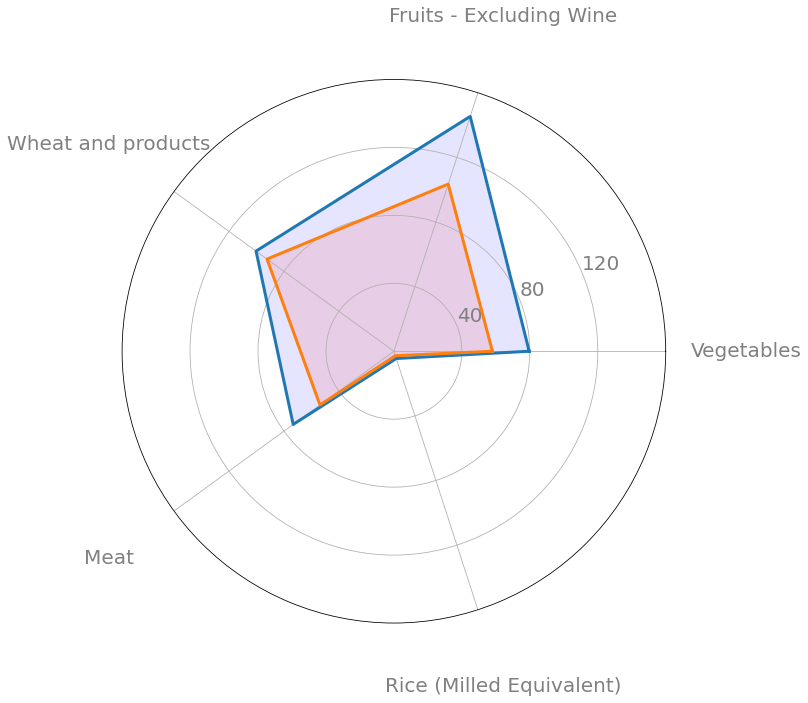

In [216]:
df_test = df2[df2.Area =='Norway']

df_test = pd.DataFrame(df_test.values[:,[3,6,7]].transpose()[:,[2,3,0,4,1]])
df_test.columns = df_test.iloc[0]

df_test = df_test[1:].reset_index().drop('index', axis =1)


spider(df_test).savefig('./plots/test.png')
#df_test